In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-players-sold-2024/TOP_BUYS.csv
/kaggle/input/ipl-players-sold-2024/UNSOLD_PLAYERS.csv
/kaggle/input/ipl-players-sold-2024/IPL_PLAYERS.csv


In [2]:
df=pd.read_csv('/kaggle/input/ipl-players-sold-2024/IPL_PLAYERS.csv')
df

,PLAYERS,NATIONALITY,TYPE,PRICE PAID,TEAM
0,Avanish Rao Aravelly,Indian,Wicket-Keeper,2000000,CSK
1,Mustafizur Rahman,Overseas,Bowler,20000000,CSK
2,Daryl Mitchell,Overseas,All-Rounder,140000000,CSK
3,Sameer Rizvi,Indian,Batter,84000000,CSK
4,Rachin Ravindra,Overseas,All-Rounder,18000000,CSK
...,...,...,...,...,...
67,Akash Singh,Indian,Bowler,2000000,SH
68,Jaydev Unadkat,Indian,Bowler,16000000,SH
69,Wanindu Hasaranga,Overseas,All-Rounder,15000000,SH
70,Pat Cummins,Overseas,All-Rounder,205000000,SH


In [3]:
df.isna().sum()

PLAYERS        0
NATIONALITY    0
TYPE           0
PRICE PAID     0
TEAM           0
dtype: int64

In [4]:
df.duplicated().sum()

0

# EDA

> ***EDA stands for Exploratory Data Analysis, and it is a crucial step in the process of machine learning (ML). EDA involves the exploration, visualization, and analysis of data sets to understand their main characteristics, uncover patterns, identify trends, and detect outliers. The primary goal of EDA is to gain insights into the data and inform the subsequent steps in the ML workflow.***
> ***I will use plotly for most of the plots .***

> ***Plotly is a data visualization library that allows users to create interactive and dynamic plots in Python, R, and Julia. It provides a high-level interface for creating a wide variety of charts and graphs, including line charts, bar charts, scatter plots, heatmaps, and more***.

> ***You can interact with the plot by using the tools shown in top right corner of each plot. Just head to the top right corner of the plot to explore and play around with it. Note- use reset axes to bring back the plot in normal form***

In [5]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df

,PLAYERS,NATIONALITY,TYPE,PRICE PAID,TEAM
0,Avanish Rao Aravelly,Indian,Wicket-Keeper,2000000,CSK
1,Mustafizur Rahman,Overseas,Bowler,20000000,CSK
2,Daryl Mitchell,Overseas,All-Rounder,140000000,CSK
3,Sameer Rizvi,Indian,Batter,84000000,CSK
4,Rachin Ravindra,Overseas,All-Rounder,18000000,CSK
...,...,...,...,...,...
67,Akash Singh,Indian,Bowler,2000000,SH
68,Jaydev Unadkat,Indian,Bowler,16000000,SH
69,Wanindu Hasaranga,Overseas,All-Rounder,15000000,SH
70,Pat Cummins,Overseas,All-Rounder,205000000,SH


In [7]:
teams=list(df['TEAM'].unique())
teams


['CSK', 'DC', 'GT', 'KKR', 'LSG', 'MI', 'PK', 'RR', 'RCB', 'SH']

In [8]:
from wordcloud import WordCloud

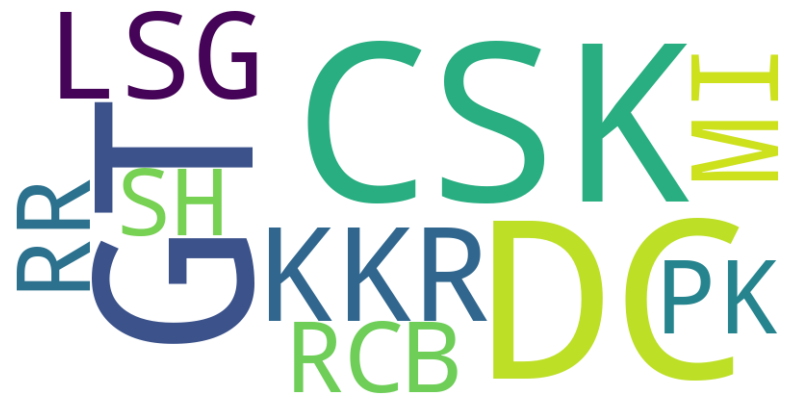

In [9]:
text=','.join(teams)
wordcloud=WordCloud(width=800 ,height=400 ,background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
df['TEAM'].value_counts()

TEAM
KKR    10
DC      9
GT      8
MI      8
PK      8
CSK     6
LSG     6
RCB     6
SH      6
RR      5
Name: count, dtype: int64

In [11]:
Most_exp_players=df.sort_values(by='PRICE PAID',ascending=False)
Most_exp_players

,PLAYERS,NATIONALITY,TYPE,PRICE PAID,TEAM
27,Mitchell Starc,Overseas,Bowler,247500000,KKR
70,Pat Cummins,Overseas,All-Rounder,205000000,SH
2,Daryl Mitchell,Overseas,All-Rounder,140000000,CSK
54,Harshal Patel,Indian,All-Rounder,117500000,PK
63,Alzarri Joseph,Overseas,Bowler,115000000,RCB
...,...,...,...,...,...
48,Tanay Thyagarajann,Indian,All-Rounder,2000000,PK
49,Vishwanath Pratap Singh,Indian,All-Rounder,2000000,PK
50,Ashutosh Sharma,Indian,All-Rounder,2000000,PK
51,Shashank Singh,Indian,Batter,2000000,PK


In [12]:
fig=px.bar(Most_exp_players.head(15),x='PLAYERS',y='PRICE PAID',color='TEAM',title='Top 15 Most expensive players',text_auto='0.2s')
fig.show(renderer='iframe')

In [13]:
df['TYPE'].value_counts().reset_index()

,TYPE,count
0,Bowler,26
1,All-Rounder,25
2,Batter,13
3,Wicket-Keeper,8


In [14]:
fig=px.bar(df['TYPE'].value_counts().reset_index(),x='TYPE',y='count',title='Type of player distribution',color='count')
fig.show(render='iframe')

In [15]:
Most_expensive_player_teamwise=pd.DataFrame()
for team in teams:
    temp_df=df[df['TEAM']==team].sort_values(by='PRICE PAID',ascending=False).head(1)
    Most_expensive_player_teamwise=pd.concat([Most_expensive_player_teamwise,temp_df],ignore_index=True)
Most_expensive_player_teamwise

,PLAYERS,NATIONALITY,TYPE,PRICE PAID,TEAM
0,Daryl Mitchell,Overseas,All-Rounder,140000000,CSK
1,Kumar Kushagra,Indian,Wicket-Keeper,72000000,DC
2,Spencer Johnson,Overseas,Bowler,100000000,GT
3,Mitchell Starc,Overseas,Bowler,247500000,KKR
4,Shivam Mavi,Indian,Bowler,64000000,LSG
5,Gerald Coetzee,Overseas,All-Rounder,50000000,MI
6,Harshal Patel,Indian,All-Rounder,117500000,PK
7,Rovman Powell,Overseas,Batter,74000000,RR
8,Alzarri Joseph,Overseas,Bowler,115000000,RCB
9,Pat Cummins,Overseas,All-Rounder,205000000,SH


In [16]:
fig=px.bar(Most_expensive_player_teamwise,x='TEAM',y='PRICE PAID',text='PLAYERS',color='TYPE',title='Most Expensive in each Team')
fig.show(render='iframe')

In [17]:
type_of_player=df['TYPE'].unique()
type_of_player

array(['Wicket-Keeper', 'Bowler', 'All-Rounder', 'Batter'], dtype=object)

In [18]:
Most_expensive_player_type=pd.DataFrame()
for typ in type_of_player:
    temp_df=df[df['TYPE']==typ].sort_values(by='PRICE PAID',ascending=False).head(1)
    Most_expensive_player_type=pd.concat([Most_expensive_player_type,temp_df],ignore_index=True)
Most_expensive_player_type

,PLAYERS,NATIONALITY,TYPE,PRICE PAID,TEAM
0,Kumar Kushagra,Indian,Wicket-Keeper,72000000,DC
1,Mitchell Starc,Overseas,Bowler,247500000,KKR
2,Pat Cummins,Overseas,All-Rounder,205000000,SH
3,Sameer Rizvi,Indian,Batter,84000000,CSK


In [19]:
fig=px.bar(Most_expensive_player_type,x='TYPE',y='PRICE PAID',text='PLAYERS',color='TEAM',title='Most Expensive player in each Type',text_auto='0.2s')
fig.show(renderer='iframe')

In [20]:
df_unsold=pd.read_csv('/kaggle/input/ipl-players-sold-2024/UNSOLD_PLAYERS.csv')
df_unsold

,PLAYER,NATIONALITY,TYPE,BASE PRICE
0,Priyansh Arya,Indian,Batter,2000000
1,Rohan Kunnummal,Indian,Batter,2000000
2,Manan Vohra,Indian,Batter,2000000
3,Raj Angad Bawa,Indian,All-Rounder,2000000
4,Sarfaraz Khan,Indian,All-Rounder,2000000
...,...,...,...,...
255,Kamlesh Nagarkoti,Indian,All-Rounder,3000000
256,Basil Thampi,Indian,Bowler,3000000
257,Lalit Yadav,Indian,Bowler,3000000
258,S Midhun,Indian,Bowler,3000000


In [21]:
df['TYPE'].value_counts().reset_index()

,TYPE,count
0,Bowler,26
1,All-Rounder,25
2,Batter,13
3,Wicket-Keeper,8


In [22]:
fig=px.bar(df['TYPE'].value_counts().reset_index(),x='TYPE',y='count',title='Unsold Players analysis',color='count')
fig.show(renderer='iframe')